In [26]:
import cv2
import os
from PIL import Image
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import PyPDF2
import PIL
from PIL import Image
import pdf2image
PIL.Image.MAX_IMAGE_PIXELS = 193622420
from pdf2image import convert_from_path

In [27]:
for f in os.listdir('C:\\DRUM_ GAD_11June2021\\t\\'):
    if f.endswith('.pdf'):
        print(f)
        images=convert_from_path('C:\\DRUM_ GAD_11June2021\\t\\'+f,poppler_path=r'C:\Program Files\poppler-0.68.0\bin',dpi=600)

        for i,img in enumerate(images):
            img.save('C:\\DRUM_ GAD_11June2021\\t\\DRUM_GAD_IMG\\'+f.split('.pdf')[0]+str(i)+'.jpg','JPEG')

10011-4D1JCR-MVV2114-TEP-D-00-CRC301-B02-0019.pdf


In [28]:
for f in os.listdir('C:\\DRUM_ GAD_11June2021\\t\\DRUM_GAD_IMG'):
    if f.endswith('jpg'):
        print(f)
        img=cv2.imread('C:\\DRUM_ GAD_11June2021\\t\\DRUM_GAD_IMG\\'+f)
        print(img.shape)
        h,w,_=img.shape
        #print()
        img_crop=img[int(h*0.01):h,int(w*0.65):w]
        cv2.imwrite('C:\\DRUM_ GAD_11June2021\\t\\DRUM_GAD_IMG_CROP\\'+f+'_crop'+'.jpg',img_crop)

10011-4D1JCR-MVV2114-TEP-D-00-CRC301-B02-00190.jpg
(14034, 19867, 3)


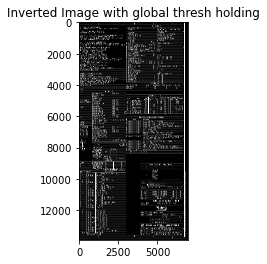

In [33]:
img=cv2.imread('C:\\DRUM_ GAD_11June2021\\t\\DRUM_GAD_IMG_CROP\\10011-4D1JCR-MVV2114-TEP-D-00-CRC301-B02-00190.jpg_crop.jpg',0)
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
#img_bin = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            #cv2.THRESH_BINARY,15,2)
kernel=np.ones((2,2),np.uint8)
img_bin=cv2.erode(img_bin,kernel)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

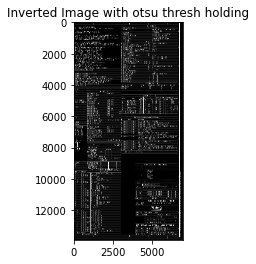

In [34]:
img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

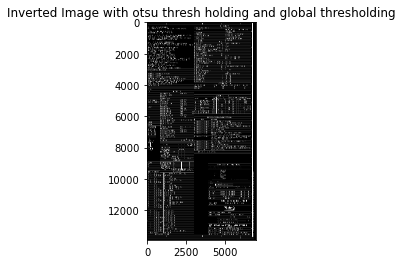

In [35]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding and global thresholding")
plt.show()

In [36]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
print(kernel)

[[1 1]
 [1 1]]


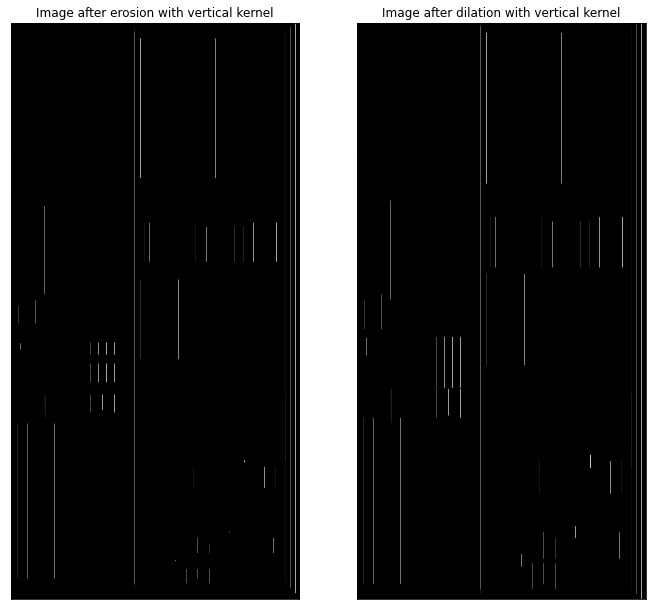

In [37]:
import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=2)
plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=4)
plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()

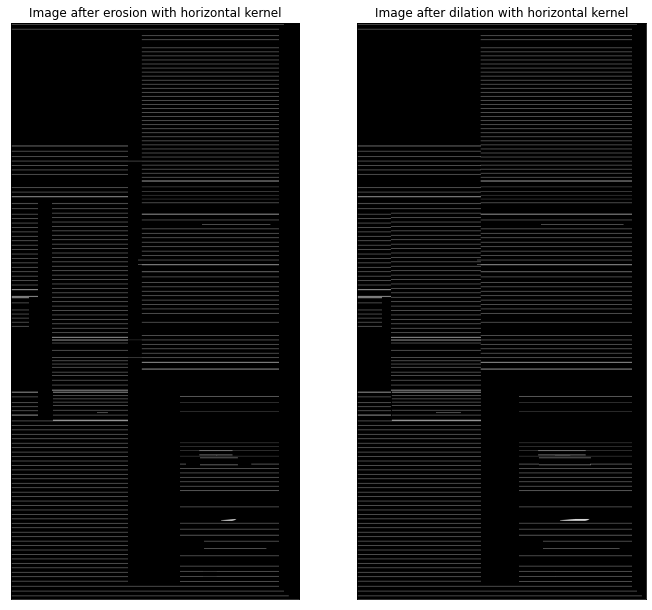

In [38]:
plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()

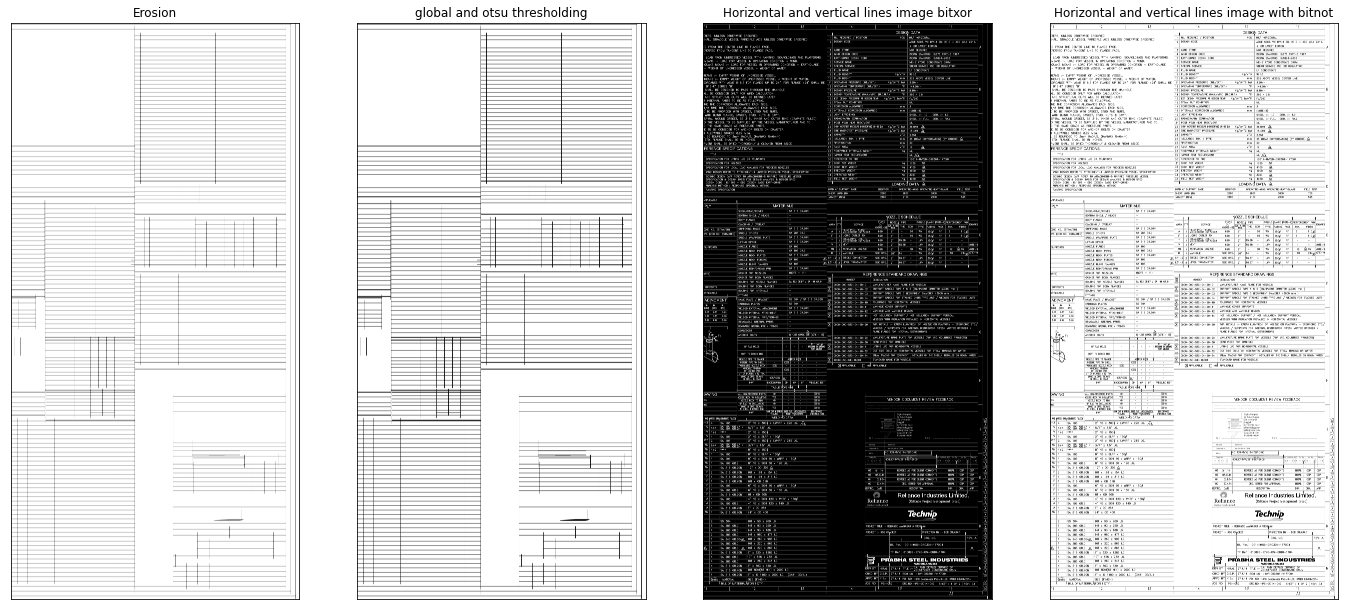

In [39]:
plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()

In [19]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [20]:
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

4924 335 1686 88
3121 335 1794 88
2988 335 124 88
4924 433 1686 185
3121 433 1794 185
2988 433 124 185
4924 628 1686 87
3121 628 1794 87
2988 628 124 87
4924 725 1686 87
3121 725 1794 87
2988 725 124 87
4924 822 1686 88
3121 822 1794 88
2988 822 124 88
4924 920 1686 87
3121 920 1794 87
2988 920 124 87
4924 1017 1686 88
3121 1017 1794 88
2988 1017 124 88
4924 1115 1686 87
3121 1115 1794 87
2988 1115 124 87
4924 1212 1686 87
3121 1212 1794 87
2988 1212 124 87
4924 1309 1686 88
3121 1309 1794 88
2988 1309 124 88
4924 1407 1686 87
3121 1407 1794 87
2988 1407 124 87
4924 1504 1686 88
3121 1504 1794 88
2988 1504 124 88
4924 1602 1686 87
3121 1602 1794 87
2988 1602 124 87
4924 1699 1686 87
3121 1699 1794 87
2988 1699 124 87
4924 1796 1686 88
3121 1796 1794 88
2988 1796 124 88
4924 1894 1686 87
3121 1894 1794 87
2988 1894 124 87
4924 1991 1686 88
3121 1991 1794 88
2988 1991 124 88
4924 2089 1686 87
3121 2089 1794 87
2988 2089 124 87
4924 2186 1686 87
3121 2186 1794 87
2988 2186 124 87
4924 228

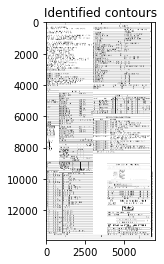

In [21]:
boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<2100 and h<500):
        print(x,y,w,h)
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        #cv2.imshow('IMAGE',image)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        boxes.append([x,y,w,h])
    #else:
        #print(x,y,w,h)
    
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [22]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
    if(boxes[i][1]<=previous[1]+mean/10):
        print("iffffff",i)
        print(boxes[i],previous[1])
        columns.append(boxes[i])
        previous=boxes[i]
        if(i==len(boxes)-1):
            rows.append(columns)
    else:
        print("else",i)
        print(boxes[i],previous[1])
       #print(boxes[i])
        #print("11111111111111111111111111111111111")
        rows.append(columns)
        columns=[]
        previous = boxes[i]
        columns.append(boxes[i])

157.80720092915215
iffffff 1
[3121, 335, 1794, 88] 335
iffffff 2
[2988, 335, 124, 88] 335
else 3
[4924, 433, 1686, 185] 335
iffffff 4
[3121, 433, 1794, 185] 433
iffffff 5
[2988, 433, 124, 185] 433
else 6
[4924, 628, 1686, 87] 433
iffffff 7
[3121, 628, 1794, 87] 628
iffffff 8
[2988, 628, 124, 87] 628
else 9
[4924, 725, 1686, 87] 628
iffffff 10
[3121, 725, 1794, 87] 725
iffffff 11
[2988, 725, 124, 87] 725
else 12
[4924, 822, 1686, 88] 725
iffffff 13
[3121, 822, 1794, 88] 822
iffffff 14
[2988, 822, 124, 88] 822
else 15
[4924, 920, 1686, 87] 822
iffffff 16
[3121, 920, 1794, 87] 920
iffffff 17
[2988, 920, 124, 87] 920
else 18
[4924, 1017, 1686, 88] 920
iffffff 19
[3121, 1017, 1794, 88] 1017
iffffff 20
[2988, 1017, 124, 88] 1017
else 21
[4924, 1115, 1686, 87] 1017
iffffff 22
[3121, 1115, 1794, 87] 1115
iffffff 23
[2988, 1115, 124, 87] 1115
else 24
[4924, 1212, 1686, 87] 1115
iffffff 25
[3121, 1212, 1794, 87] 1212
iffffff 26
[2988, 1212, 124, 87] 1212
else 27
[4924, 1309, 1686, 88] 1212
iffff

In [40]:
def takeSecond(elem):
    return elem[0]

In [41]:
a=rows

In [42]:
c=[]
#b=[]
for i in a:
    i.sort(key=takeSecond)
    #print(i)
    b=[]
    for idx,p in enumerate(i):
        print(p)
        x,y,w,h=p
        roi=img[y:y+h,x:x+w]
        kernel=np.ones((2,2),np.uint8)
        roi=cv2.erode(roi,kernel)
        out = pytesseract.image_to_string(roi)
        #b.append(out)
        #print(out)
        if(len(out)==1):
            kernel = np.ones((3,3), np.uint8)
            roi=cv2.dilate(roi,kernel)
            #cv2.imwrite('roi.png',roi)
            out = pytesseract.image_to_string(roi)
            #out = pytesseract.image_to_string(roi)
        print(out)
        b.append(out.strip())
    c.append(b)

[2988, 335, 124, 88]

[3121, 335, 1794, 88]
No. REQUIRED / POSITION PCS

[4924, 335, 1686, 88]
01/ HORIZONTAL

[2988, 433, 124, 185]

[3121, 433, 1794, 185]
DESIGN CODE

[4924, 433, 1686, 185]
ASME SECT. Vill DIV-1 ED. 2010 + ADD JULY 2011.
+ IBR LATEST EDITION

[2988, 628, 124, 87]

[3121, 628, 1794, 87]
ASME STAMP

[4924, 628, 1686, 87]
NOT REQUIRED

[2988, 725, 124, 87]

[3121, 725, 1794, 87]
WIND DESIGN CODE

[4924, 725, 1686, 87]
INDIAN STANDARD. |IS:875 PART—3 1987

[2988, 822, 124, 88]

[3121, 822, 1794, 88]
EARTHQUAKE DESIGN CODE

[4924, 822, 1686, 88]
INDIAN STANDARD. 1IS:1893—2005

[2988, 920, 124, 87]

[3121, 920, 1794, 87]
SERVICE NAME

[4924, 920, 1686, 87]
ME-—S177003 CONDENSATE DRUM

[2988, 1017, 124, 88]

[3121, 1017, 1794, 88]
SPECIAL SERVICE

[4924, 1017, 1686, 88]
STEAM SERVICE AND IBR REGULATION

[2988, 1115, 124, 87]

[3121, 1115, 1794, 87]
FLUID NAME

[4924, 1115, 1686, 87]
LP CONDENSATE

[2988, 1212, 124, 87]

[3121, 1212, 1794, 87]
FLUID

KeyboardInterrupt: 

In [44]:
c

[['', 'No. REQUIRED / POSITION PCS', '01/ HORIZONTAL'],
 ['',
  'DESIGN CODE',
  'ASME SECT. Vill DIV-1 ED. 2010 + ADD JULY 2011.\n+ IBR LATEST EDITION'],
 ['', 'ASME STAMP', 'NOT REQUIRED'],
 ['', 'WIND DESIGN CODE', 'INDIAN STANDARD. |IS:875 PART—3 1987'],
 ['', 'EARTHQUAKE DESIGN CODE', 'INDIAN STANDARD. 1IS:1893—2005'],
 ['', 'SERVICE NAME', 'ME-—S177003 CONDENSATE DRUM'],
 ['', 'SPECIAL SERVICE', 'STEAM SERVICE AND IBR REGULATION'],
 ['', 'FLUID NAME', 'LP CONDENSATE'],
 ['', 'FLUID DENSITY Kg/M~3', '921.5'],
 ['10', 'FLUID HEIGHT', '275 ABOVE VESSEL CENTER LINE'],
 ['11', 'OPERATING PRESSURE (INT./EXT.) Kg/cem~2 (g)', '3.20/-'],
 ['', 'OPERATING TEMPERATURE (INT./EXT.)', '144.90/—'],
 ['15', 'DESIGN PRESSURE Kg/cem~2 (g)', '8.10/—'],
 ['14', 'DESIGN TEMPERATURE (MAX./MIN.) (M.D.M.T.)', '260 / 7.5'],
 ['i', 'EXT. DESIGN PRESSURE AT DESIGN TEMP. Kg/cm~2 (g)/°C', 'FV/260'],
 ['', 'STEAM OUT CONDITION', 'NIL'],
 ['', 'CORROSION ALLOWANCE', ''],
 ['', 'INTERNALS CORROSION ALLOWANCE', 

In [367]:
img=cv2.imread('C:\\DRUM_ GAD_11June2021\\t\\DRUM_GAD_IMG\\10011-4D1JCR-MVV2114-TEP-D-00-CRC301-B02-00190.jpg',0)
x,y,w,h=2081, 420, 1195, 57
roi=img[y:y+h,x:x+w]
kernel=np.ones((3,3),np.uint8)
roi=cv2.dilate(roi,kernel)
cv2.imshow('img',roi)
cv2.waitKey(0)
cv2.destroyAllWindows()
out = pytesseract.image_to_string(roi)
print(out)
print(len(out))


1


In [336]:
c

[[''],
 [''],
 ['', 'No. REQUIRED / POSITION PCS', '01/ HORIZONTAL'],
 ['',
  'DESIGN CODE',
  'ASME SECT. Vill DIV—1 ED. 2010 + ADD JULY 2011.\n+ IBR LATEST EDITION'],
 ['', 'ASME STAMP', 'NOT REQUIRED'],
 ['', 'WIND DESIGN CODE', 'INDIAN STANDARD. IS:875 PART—3 1987'],
 ['', 'EARTHQUAKE DESIGN CODE', 'INDIAN STANDARD. IS:1893—2005'],
 ['', 'SERVICE NAME', 'ME-—S177003 CONDENSATE DRUM'],
 ['', 'SPECIAL SERVICE', 'STEAM SERVICE AND IBR REGULATION'],
 ['', 'FLUID NAME', 'LP CONDENSATE'],
 ['', 'FLUID DENSITY Kg/M~3', '921.5'],
 ['10°', 'FLUID HEIGHT\n\nmm', '275 ABOVE VESSEL CENTER LINE'],
 ['Pd.', 'OPERATING PRESSURE (INT./EXT.) Kg/cm~2 (g)', '| $20 /—'],
 ['4g', 'OPERATING TEMPERATURE (INT./EXT.)\n\n°C', '144.90/—'],
 ['13', 'DESIGN PRESSURE Kg/cm~2 (g)', '| 8.10/-'],
 ['', 'DESIGN TEMPERATURE (MAX./MIN.) (M.D.M.T.)', '260 / 7.5'],
 ['15)', 'EXT. DESIGN PRESSURE AT DESIGN TEMP. Kg/cm~2 (g)/*C', 'FV/260'],
 ['16', 'STEAM OUT CONDITION', 'NIL'],
 ['17', 'CORROSION ALLOWANCE\n\nmm', '3']

In [43]:
for index,extractedList in enumerate(c):
    print(index,extractedList)

0 ['', 'No. REQUIRED / POSITION PCS', '01/ HORIZONTAL']
1 ['', 'DESIGN CODE', 'ASME SECT. Vill DIV-1 ED. 2010 + ADD JULY 2011.\n+ IBR LATEST EDITION']
2 ['', 'ASME STAMP', 'NOT REQUIRED']
3 ['', 'WIND DESIGN CODE', 'INDIAN STANDARD. |IS:875 PART—3 1987']
4 ['', 'EARTHQUAKE DESIGN CODE', 'INDIAN STANDARD. 1IS:1893—2005']
5 ['', 'SERVICE NAME', 'ME-—S177003 CONDENSATE DRUM']
6 ['', 'SPECIAL SERVICE', 'STEAM SERVICE AND IBR REGULATION']
7 ['', 'FLUID NAME', 'LP CONDENSATE']
8 ['', 'FLUID DENSITY Kg/M~3', '921.5']
9 ['10', 'FLUID HEIGHT', '275 ABOVE VESSEL CENTER LINE']
10 ['11', 'OPERATING PRESSURE (INT./EXT.) Kg/cem~2 (g)', '3.20/-']
11 ['', 'OPERATING TEMPERATURE (INT./EXT.)', '144.90/—']
12 ['15', 'DESIGN PRESSURE Kg/cem~2 (g)', '8.10/—']
13 ['14', 'DESIGN TEMPERATURE (MAX./MIN.) (M.D.M.T.)', '260 / 7.5']
14 ['i', 'EXT. DESIGN PRESSURE AT DESIGN TEMP. Kg/cm~2 (g)/°C', 'FV/260']
15 ['', 'STEAM OUT CONDITION', 'NIL']
16 ['', 'CORROSION ALLOWANCE', '']
17 ['', 'INTERNALS CORROSION ALLOWAN

In [360]:
import re
k1=[]
for i in c:
    s=[]
    for r in i:
        #s=[]
        #print(r)
        r=re.sub('\n','',r)
        r= re.sub('~', '^', r)
        r=re.sub('em','cm',r)
        s.append(r)
    k1.append(s)
    #print(i)
        #if '~' in r:
            #print(r)
            #print(r.split())
            #print(r.replace('\n',''))
        #print(r.replace('~','^'))

In [361]:
k1

[[''],
 [''],
 ['', 'No. REQUIRED / POSITION PCS', '01/ HORIZONTAL'],
 ['',
  'DESIGN CODE',
  'ASME SECT. Vill DIV—1 ED. 2010 + ADD JULY 2011.+ IBR LATEST EDITION'],
 ['', 'ASME STAMP', 'NOT REQUIRED'],
 ['', 'WIND DESIGN CODE', 'INDIAN STANDARD. IS:875 PART—3 1987'],
 ['', 'EARTHQUAKE DESIGN CODE', 'INDIAN STANDARD. IS:1893—2005'],
 ['', 'SERVICE NAME', 'ME-—S177003 CONDENSATE DRUM'],
 ['', 'SPECIAL SERVICE', 'STEAM SERVICE AND IBR REGULATION'],
 ['', 'FLUID NAME', 'LP CONDENSATE'],
 ['', 'FLUID DENSITY Kg/M^3', '921.5'],
 ['10°', 'FLUID HEIGHTmm', '275 ABOVE VESSEL CENTER LINE'],
 ['Pd.', 'OPERATING PRESSURE (INT./EXT.) Kg/cm^2 (g)', '| $20 /—'],
 ['4g', 'OPERATING TEMPERATURE (INT./EXT.)°C', '144.90/—'],
 ['13', 'DESIGN PRESSURE Kg/cm^2 (g)', '| 8.10/-'],
 ['', 'DESIGN TEMPERATURE (MAX./MIN.) (M.D.M.T.)', '260 / 7.5'],
 ['15)', 'EXT. DESIGN PRESSURE AT DESIGN TEMP. Kg/cm^2 (g)/*C', 'FV/260'],
 ['16', 'STEAM OUT CONDITION', 'NIL'],
 ['17', 'CORROSION ALLOWANCEmm', '3'],
 ['18', 'INT

In [362]:
b=k1

In [363]:
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
from openpyxl import load_workbook

In [364]:
wb = load_workbook('C:\Data\GAD PDF\drum GAD\\12.xlsx')
ws = wb.active
model_max_row = ws.max_row
f=[]
for k in range(2, model_max_row + 1):
    ril_attr = ws.cell(row = k, column=2).value
    attribute = ws.cell(row=k, column=3).value
    #print(attribute,len(attribute))
    #pick_records=ws.cell(row=k,column=8).value
    pick_records=1
    uom=1
    #uom=ws.cell(row=k,column=6).value
    for extractedList in b:
        #print(extractedList)
        for item in extractedList:
            #print(item)
            if attribute.lower() in item.lower() or item.lower() in attribute.lower():
                #print(attribute.lower(),item.lower())
                d=similar(attribute.lower(),item.lower())
                if d>=0.85:
                    try:
                        k=0
                        #print(attribute,"rrrrrrrrr",item)
                    #print(extractedList)
                        p=extractedList
                        k=extractedList.index(item)
                        value=extractedList[k+pick_records]
                        if uom is not None:
                            units=item.replace(attribute,'')
                            #print(attribute,item)
                            print(attribute,"222222",value,"ggggggggggg",units)
                        else:
                            print(attribute,"22222222222",value)
                    except:
                        pass

AttributeError: 'NoneType' object has no attribute 'lower'

In [128]:
import pickle

with open('C://Data//GAD PDF//drum GAD//file.pkl', 'wb') as f:
    pickle.dump(k, f)

In [162]:
uom1=['Kg/M^3','Kg/cm^2 (g)','Kg/cm^2 (g)/°C','Kg','Kg/ccm^2 (g']

In [118]:
for i in k:
    #print(i)
    for t in uom:
        for p in i:
            if t in p:
                print(p)
                s=p.replace(t,'')
                print(s)
        #for d in uom:
         #   print(d)
            #if d in p:
             #   print(d)
                #uom=p.replace(d,'')
                #print(uom,d)
   

FLUID DENSITYKg/M^3
FLUID DENSITY
FLUID DENSITYKg/M^3
FLUID DENSITY/M^3
OPERATING PRESSURE (INT./EXT.)Kg/cm^2 (g)
OPERATING PRESSURE (INT./EXT.)
OPERATING PRESSURE (INT./EXT.)Kg/cm^2 (g)
OPERATING PRESSURE (INT./EXT.)/cm^2 (g)
DESIGN PRESSUREKg/ccm^2 (g)
DESIGN PRESSURE/ccm^2 (g)
EXT. DESIGN PRESSURE AT DESIGN TEMP.Kg/cm^2 (g)/*C
EXT. DESIGN PRESSURE AT DESIGN TEMP./*C
EXT. DESIGN PRESSURE AT DESIGN TEMP.Kg/cm^2 (g)/*C
EXT. DESIGN PRESSURE AT DESIGN TEMP./cm^2 (g)/*C
SHOP HYDROTEST PRESSURE (HORIZONTAL) UG-99 (c) Kg/cm^2 (g)
SHOP HYDROTEST PRESSURE (HORIZONTAL) UG-99 (c) 
SHOP HYDROTEST PRESSURE (HORIZONTAL) UG-99 (c) Kg/cm^2 (g)
SHOP HYDROTEST PRESSURE (HORIZONTAL) UG-99 (c) /cm^2 (g)
SITE HYDROTEST PRESSUREKg/cm^2 (g)
SITE HYDROTEST PRESSURE
SITE HYDROTEST PRESSUREKg/cm^2 (g)
SITE HYDROTEST PRESSURE/cm^2 (g)
REMOVABLE INTERNALS WEIGHTKg
REMOVABLE INTERNALS WEIGHT
SHOP NET WEIGHTKg
SHOP NET WEIGHT
SHOP TEST WEIGHTKg
SHOP TEST WEIGHT
ERECTION WEIGHTKg
ERECTION WEIGHT
OPERATING WEIGHTKg

In [131]:
b=k

In [133]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [134]:
from openpyxl import load_workbook

In [163]:
wb = load_workbook('C:\\Users\\Tanmay.Pal\\Desktop\\New final code\\Book1.xlsx')
ws = wb.active
model_max_row = ws.max_row
f=[]
for k in range(2, model_max_row + 1):
    ril_attr = ws.cell(row = k, column=2).value
    attribute = ws.cell(row=k, column=3).value
    #print(attribute,len(attribute))
    pick_records=ws.cell(row=k,column=8).value
    uom=ws.cell(row=k,column=6).value
    for extractedList in b:
        #print(extractedList)
        for item in extractedList:
            for i in uom1:
                if i in item:
                    item=item.replace(i,'')
                    print("uom",item)
            d=similar(attribute.lower(),item.lower())
            if d>=0.85:
                try:
                    #if uom1[i] in item:
                     #   item=item.replace(uom1[i],'')
                    p=extractedList
                    k=extractedList.index(item)
                    value=extractedList[k+pick_records]
                    if uom is not None:
                        units=item.replace(attribute,'')
                        #print(attribute,item)
                        print(attribute,"iiiiiiiii",item,"222222",value,"uuuuuuuuu",units)
                        print("nextttttttttttttt")
                    else:
                        print(attribute,"22222222222",value)
                except:
                    pass
            #except:
             #   pass

uom FLUID DENSITY
uom OPERATING PRESSURE (INT./EXT.)
uom DESIGN PRESSURE/ccm^2 (g)
uom EXT. DESIGN PRESSURE AT DESIGN TEMP./*C
uom SHOP HYDROTEST PRESSURE (HORIZONTAL) UG-99 (c) 
uom SITE HYDROTEST PRESSURE
uom REMOVABLE INTERNALS WEIGHT
uom SHOP NET WEIGHT
uom SHOP TEST WEIGHT
uom ERECTION WEIGHT
uom OPERATING WEIGHT
uom FIELD TEST WEIGHT
uom FLUID DENSITY
uom OPERATING PRESSURE (INT./EXT.)
uom DESIGN PRESSURE/ccm^2 (g)
uom EXT. DESIGN PRESSURE AT DESIGN TEMP./*C
uom SHOP HYDROTEST PRESSURE (HORIZONTAL) UG-99 (c) 
uom SITE HYDROTEST PRESSURE
uom REMOVABLE INTERNALS WEIGHT
uom SHOP NET WEIGHT
uom SHOP TEST WEIGHT
uom ERECTION WEIGHT
uom OPERATING WEIGHT
uom FIELD TEST WEIGHT
uom FLUID DENSITY
uom OPERATING PRESSURE (INT./EXT.)
uom DESIGN PRESSURE/ccm^2 (g)
uom EXT. DESIGN PRESSURE AT DESIGN TEMP./*C
uom SHOP HYDROTEST PRESSURE (HORIZONTAL) UG-99 (c) 
uom SITE HYDROTEST PRESSURE
uom REMOVABLE INTERNALS WEIGHT
uom SHOP NET WEIGHT
uom SHOP TEST WEIGHT
uom ERECTION WEIGHT
uom OPERATING WEI

In [154]:
item='OPERATING PRESSURE (INT./EXT.)Kg/cm^2 (g)'
if uom1[i] in item:
    item=item.replace(uom1[i],'')
    print(item)

TypeError: list indices must be integers or slices, not list

In [148]:
similar('OPERATING PRESSURE (INT./EXT.)','OPERATING TEMPERATURE (INT./EXT.)')

0.8571428571428571

In [123]:
wb = load_workbook('C:\\Users\\Tanmay.Pal\\Desktop\\New final code\\Drum_GAD.xlsx')
ws = wb.active
model_max_row = ws.max_row
f=[]
for k in range(2, model_max_row + 1):
    ril_attr = ws.cell(row = k, column=2).value
    #print(ril_attr)
    #f=[]
    for idx1,i in enumerate(b):
        #for t in uom:
        for idx,p in enumerate(i):
            d=similar(ril_attr,p)
            if d>=0.8:
            #print(ril_attr,p,d)
                d=i.index(p)
                print(p,ril_attr)

FLUID NAME FLUID NAME
OPERATING WEIGHTKg OPERATING WEIGHT
INTERNALS CORROSION ALLOWANCE HEAD EXTERNAL CORROSION ALLOWANCE
INTERNALS CORROSION ALLOWANCE HEAD INTERNAL CORROSION ALLOWANCE
INTERNALS CORROSION ALLOWANCE SHELL EXTERNAL CORROSION ALLOWANCE
INTERNALS CORROSION ALLOWANCE SHELL INTERNAL CORROSION ALLOWANCE
POST WELD HEAT TREATMENT POST WELD HEAT TREATMENT
INTERNALS CORROSION ALLOWANCE NOZZLE INTERNAL CORROSION ALLOWANCE
INTERNALS CORROSION ALLOWANCE NOZZLE EXTERNAL CORROSION ALLOWANCE


TypeError: object of type 'NoneType' has no len()

In [ ]:
wb = load_workbook('C:\\Data\\GAD PDF\\drum GAD\\Drum_GAD.xlsx')
ws = wb.active
model_max_row = 
f=[]
for k in range(2, model_max_row + 1):
    ril_attr = ws.cell(row = k, column=2).value
    #print(ril_attr)
    #f=[]
    for idx1,i in enumerate(b):
        #for t in uom:
        for idx,p in enumerate(i):
            d=similar(ril_attr,p)
            if d>=0.7:
            #print(ril_attr,p,d)
                d=i.index(p)


                e=i[d+1:]
                if len(i[d+1:])==2:
                #print(i[d+1:])
                    e=i[d+1:]
                #print("eeeeeeeeeee",e)
                    value1=e[0]
                #print("value1",e[0])
                #print(len(value1))
                    value2=e[1]
                    for t in uom:
                        if t in p:
                        #print(t)
                            y=p.replace(t,'')
                            y1=t

                            print("The key is {},the shell side is {},The tube side value is{},The UOM  is {}".format(p,value1,value2,y1))
                    #else :
                    print("The key is {},the shell side is {},The tube side value is{}".format(p,value1,value2))
                else:

                    value1=i[d+1:]
                    for t in uom:
                        if t in p:
                        #print(t)
                            y=p.replace(t,'')
                            y1=t
                #print(value1)
                            print('The key is {},The value is {},The UOM is {}'.format(p,value1,y1))

                    print('The key is {},The value is {}'.format(p,value1))
            